## Inverse transform method

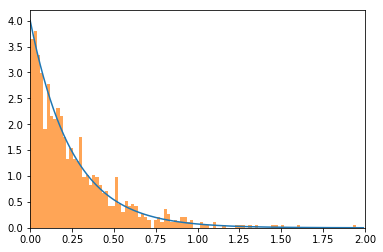

In [161]:
# u равномерно распределена на [0,1], для непрерывной F, такой, что существует обратная функция
#P(F^-1(u) <= x) = P(F(F^-1(u))) <= F(x) = P(u <= F(x)) = F(F(x)) = F(x)
import numpy as np
import matplotlib.pyplot as plt

L = 4
expsamp = - (1/L) * np.log(1 - (np.random.uniform(0, 1, 1000)))
t = np.arange(0.0, 2.0, 0.01)
 
plt.plot(t, L * np.exp(-t * L))
plt.hist(expsamp, bins = 100, density = True, alpha = 0.7)

plt.xlim(0.0, 2.0)
plt.show()

## Rejection sampling (Accept-reject method)

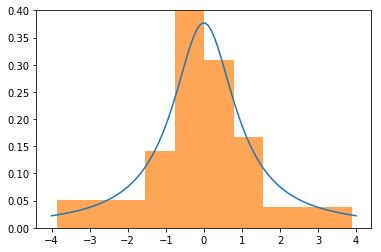

In [238]:
from scipy import stats, integrate
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)

norm, err = integrate.quad(lambda x: dist.pdf(x), -4, 4)
plt.plot(x, dist.pdf(x)/norm)

cmax = dist.pdf(x).max()/norm
rand = np.random.uniform(-4, 4, 100)
condition = rand[np.random.uniform(0, cmax, 100) < dist.pdf(rand)/norm]
cond = condition

n = condition.size
while n < 100:
    xsamp = np.random.uniform(-4, 4)
    if (np.random.uniform(0, cmax) < dist.pdf(xsamp)/norm):
        cond = np.append(cond, xsamp)
        n += 1
plt.hist(cond, density = True, alpha = 0.7)

plt.ylim(0, 0.4)
plt.show()